# Initialize

## Imports

In [3]:
from mmhuman3d.data.data_structures.human_data import HumanData
from pathlib import Path
import numpy as np
from biomechanical_intuitive_physics.biomechanics import Biomechanics

## Path

In [4]:
data_root = Path('D:/MMLAB/mmhuman3d/data/Samples/run_0/')
input_vid = data_root/ 'yoga.mp4'
mesh_vid = data_root/ 'smplx.mp4'
output_vid = data_root/ 'output.mp4'

## Model constants

In [5]:
keypoints_dict ={0:"right ankle",1:"right knee", 2:"right hip", 3:"left hip", 4:"left knee", 5:"left ankle", 6:"right wrist", 7:"right elbow", 8:"right shoulder", 9:"left shoulder", 10:"left elbow", 11:"left wrist", 12:"neck", 13:"head top"}

## Import model data

In [9]:
h_data = HumanData.fromfile(data_root /'inference_result.npz')
keypoints = h_data['keypoints3d'][:, :, :3]

# Module usage

In [10]:
bio = Biomechanics(keypoints_dict = keypoints_dict)
CoM = bio.compute_CoM(keypoints)

# Visualize

In [11]:
from biomechanical_intuitive_physics.visualiztion import scatter_3d, visualize_3d_keypoints

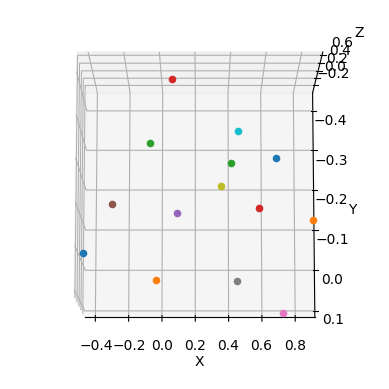

In [13]:
visualize_3d_keypoints(keypoints[0,:,:],bound = False);

In [12]:
f = scatter_3d(data_list=[keypoints, np.expand_dims(CoM.copy(), 1)],
           output_html=str(data_root / '3d_keypoints.html'),
           names=["Keypoints", "CoM"],
           colors=["blue", "red"],
           size=5)